In [2]:
!pip install scalecast --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 242 kB 5.0 MB/s 
     |████████████████████████████████| 216 kB 43.4 MB/s 
     |████████████████████████████████| 133 kB 42.3 MB/s 
  Created wheel for scalecast: filename=SCALECAST-0.13.2-py3-none-any.whl size=83126 sha256=64a9877b384844fe038d3cecbe311d31694c91ac278a11f3534d99c397d5dcb6
  Stored in directory: /root/.cache/pip/wheels/36/8c/86/b47dac9bfc6847c9e41958f79436b0d5603277fbdf9810e08e
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=c80d5cb1117d6d20938318d446380728a3f117ec774b9dbb0f91107bbb355f07
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built scalecast eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dep

In [3]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv('/content/drive/MyDrive/DTS/covid_impact_on_airport_traffic.csv',parse_dates=['Date'], usecols=['Date', 'AirportName','PercentOfBaseline'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               7247 non-null   datetime64[ns]
 1   AirportName        7247 non-null   object        
 2   PercentOfBaseline  7247 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 170.0+ KB


In [6]:
df.head()

,Date,AirportName,PercentOfBaseline
0,2020-04-03,Kingsford Smith,64
1,2020-04-13,Kingsford Smith,29
2,2020-07-10,Kingsford Smith,54
3,2020-09-02,Kingsford Smith,18
4,2020-10-31,Kingsford Smith,22


In [7]:
df.describe()

,PercentOfBaseline
count,7247.000000
mean,66.651442
std,22.134433
min,0.000000
25%,53.000000
50%,67.000000
75%,84.000000
max,100.000000


In [8]:
df['AirportName'].value_counts()

Hartsfield-Jackson Atlanta International     262
Dallas/Fort Worth International              262
John F. Kennedy International                262
Montreal Trudeau                             262
Los Angeles International                    262
Miami International                          261
Washington Dulles International              261
LaGuardia                                    261
McCarran International                       261
Newark Liberty International                 261
Charlotte Douglas International              261
Detroit Metropolitan Wayne County            261
Boston Logan International                   261
Chicago OHare International                  261
Daniel K. Inouye International               261
Seattle-Tacoma International                 261
Denver International                         261
San Francisco International                  261
Toronto Pearson                              261
Winnipeg International                       261
Vancouver Internatio

In [9]:
ds1 = df[df['AirportName']== 'Kingsford Smith']
ds1


,Date,AirportName,PercentOfBaseline
0,2020-04-03,Kingsford Smith,64
1,2020-04-13,Kingsford Smith,29
2,2020-07-10,Kingsford Smith,54
3,2020-09-02,Kingsford Smith,18
4,2020-10-31,Kingsford Smith,22
...,...,...,...
252,2020-09-07,Kingsford Smith,11
253,2020-04-16,Kingsford Smith,60
254,2020-05-25,Kingsford Smith,53
255,2020-06-04,Kingsford Smith,59


In [20]:
ds1['PercentOfBaseline']

0      64
1      29
2      54
3      18
4      22
       ..
252    11
253    60
254    53
255    59
256    55
Name: PercentOfBaseline, Length: 257, dtype: int64

In [ ]:
#Kingsford Smith

In [21]:
f = Forecaster(y=ds1['PercentOfBaseline'],
                   current_dates=ds1['Date'])
f

Forecaster(
    DateStartActuals=2020-04-03T00:00:00.000000000
    DateEndActuals=2020-07-09T00:00:00.000000000
    Freq=None
    N_actuals=257
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
)

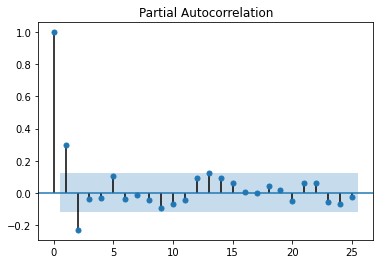

In [23]:
f.plot_pacf(lags=25)

plt.show()

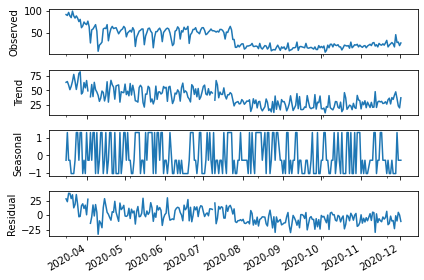

<Figure size 720x720 with 0 Axes>

In [24]:
#ds1.index = ds1.Date
f.seasonal_decompose(freq=3).plot()
plt.figure(figsize=(10,10))
plt.show()


In [87]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
stat

-11.834901084855394

In [88]:
pval

7.832679540814085e-22

In [27]:
f.set_test_length(24)       # 1. 12 observations to test the results
f.generate_future_dates(24) # 2. 12 future points to forecast

f.set_estimator('mlr') # 1. choose the mlr estimator
f.add_ar_terms(24) # 2. add regressors (24 lagged terms)
f.add_seasonal_regressors('month','quarter',dummy=True) # 2.
f.add_seasonal_regressors('year') # 2.
f.add_time_trend() # 2.
f.diff() # 3. difference non-stationary data


f.plot(models=['mlr'],
       order_by='LevelTestSetMAPE',
       level=False)

ForecastError: ignored